# University Rankings

In [768]:
%matplotlib inline
import pandas as pd
import numpy as np
times_data = pd.read_csv("data/timesData.csv")
# TODO fix this to get rest of data (Averaging Columns?) its mostly removing non scored rows
incomplete_filter = times_data.apply(lambda row : any([entry=='-' for entry in row]),axis=1) 
times_data = times_data[~incomplete_filter]

# Female male ratio as number
female_to_male = times_data['female_male_ratio'].str.split(' : ')
female = female_to_male.str[0].replace('-', None)
female = female[female.notnull()].astype(int)
male = female_to_male.str[1]
male = male[male.notnull()].astype(int)
times_data['female_male_ratio'] = female / male

import math
incomplete_filter = times_data.apply(lambda row : math.isnan(row['female_male_ratio']),axis=1) 
times_data = times_data[~incomplete_filter]

# International students as real number
international = times_data['international_students'].str.replace('%', '')
international = international[international.notnull()].astype(int)
times_data['international_students'] = international

# Remove comma from num_students
num_students = times_data['num_students'].str.replace(',', '')
num_students = num_students[num_students.notnull()].astype(int)
times_data['num_students'] = num_students

# Scores
scores = times_data['total_score']
scores = scores.replace('-', None)
scores = scores[scores.notnull()].astype(float)
times_data['total_score'] = scores

times_data.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243,6.9,27,0.492537,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074,9.0,33,0.587302,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596,7.8,22,0.724138,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,18812,11.8,34,0.851852,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,19919,11.6,34,0.851852,2011


In [769]:
shanghai_data = pd.read_csv("data/shanghaiData.csv")
shanghai_data.head()

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005
2,3,Stanford University,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005
3,4,"University of California, Berkeley",3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005
4,5,Massachusetts Institute of Technology (MIT),4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005


In [737]:
world_data = pd.read_csv("data/cwurData.csv")
world_data.columns = ['world_rank', 'university_name', 'country', 'national_rank', 'quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'broad_impact', 'patents', 'total_score', 'year']
world_data['world_rank'] = world_data['world_rank'].astype(str)
world_data.head()

,world_rank,university_name,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,total_score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [738]:
#world_data.describe()
#shanghai_data.describe()
#times_data.describe()

## UWaterloo

In [739]:
import seaborn as sb
name = 'University of Waterloo'

In [740]:
# TODO convert inner to lambda mapping
def rank_over_time(ranking_table, university_name):
    university_data = ranking_table.loc[ranking_table['university_name']==name]
    ranking_by_year = university_data.loc[:,['world_rank','year']]
    ranking_bounds = ranking_by_year['world_rank'].str.split('-')
    not_range_mask = ranking_bounds.str[1].isnull()
    rankings = []
    for i, bound in enumerate(ranking_bounds.values):
        if len(bound) > 1:
            bound[0] = (int(bound[0]) + int(bound[1]))/2
        rankings.append(int(bound[0]))
    rankings
    years = ranking_by_year['year'].values
    rankingToYear = pd.DataFrame({ 'rank' : rankings, 'year' : years })
    return rankingToYear

In [741]:
times_data_plot = rank_over_time(times_data, name)
shanghai_data_plot = rank_over_time(shanghai_data, name)
world_data_plot = rank_over_time(world_data, name)
times_data_plot['kind'] = 'Times'
shanghai_data_plot['kind'] = 'Shanghai'
world_data_plot['kind'] = 'World'
graph_data = times_data_plot.append(shanghai_data_plot).append(world_data_plot)
graph_data.head()

,rank,year,kind
0,179,2016,Times
0,251,2005,Shanghai
1,250,2006,Shanghai
2,176,2007,Shanghai
3,251,2008,Shanghai


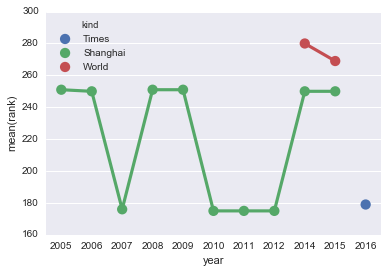

In [742]:
g = sb.pointplot(x='year', y='rank', hue='kind', data=graph_data)

## Extra Data Sets

In [743]:
school_and_country = pd.read_csv("data/school_and_country_table.csv")
#educational_attainment = pd.read_csv("data/educational_attainment_supplementary_data.csv")
#education_expenditure = pd.read_csv("data/education_expenditure_supplementary_data.csv")

In [744]:
school_and_country = pd.read_csv("data/school_and_country_table.csv")
school_and_country.head()

,school_name,country
0,Harvard University,United States of America
1,California Institute of Technology,United States of America
2,Massachusetts Institute of Technology,United States of America
3,Stanford University,United States of America
4,Princeton University,United States of America


In [745]:
# Rename columns to match shanghai data set
school_and_country.columns = ['university_name', 'country']
shanghai_data_with_country = pd.merge(school_and_country, shanghai_data, on='university_name', left_index=True, how='outer', sort=False)
shanghai_data_with_country.sort_index(inplace=True)
shanghai_data_with_country.head()

,university_name,country,world_rank,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,Harvard University,United States of America,1,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005.0
1,University of Cambridge,United Kingdom,2,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005.0
2,Stanford University,United States of America,3,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005.0
3,"University of California, Berkeley",United States of America,4,3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005.0
4,Massachusetts Institute of Technology (MIT),NaN,5,4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005.0


In [746]:
# Filter out missing countries (could try to match similar countries later eg MIT)
shanghai_data_with_country = shanghai_data_with_country[shanghai_data_with_country['country'].notnull()]
shanghai_data_with_country.head()

,university_name,country,world_rank,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,Harvard University,United States of America,1,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005.0
1,University of Cambridge,United Kingdom,2,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005.0
2,Stanford University,United States of America,3,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005.0
3,"University of California, Berkeley",United States of America,4,3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005.0
5,California Institute of Technology,United States of America,6,5,67.1,59.2,68.6,59.8,65.8,52.5,100.0,2005.0


## Predicting Scores

In [747]:
shanghai_scored_data = shanghai_data[shanghai_data.total_score.notnull()]
times_scored_data = times_data[times_data.total_score.notnull()]
world_scored_data = world_data[world_data.total_score.notnull()]

In [748]:
#X_other = times_scored_data.loc[:,['num_students', 'student_staff_ratio', 'international_students']]
# Dont want to clean any more data for now
X = times_scored_data.loc[:,['teaching', 'international', 'research', 'citations', 'income', 'female_male_ratio', 'year']]
y = times_scored_data['total_score']

In [749]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [750]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [751]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
from sklearn.cross_validation import cross_val_score
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
cv_scores

array([ 0.99941754,  0.99959775,  0.99947144,  0.99957416,  0.99972496])

In [752]:
# Optimizations

In [753]:
clf.score(X_test, y_test)

0.9996582367813186

## Predicting Trends

In [754]:
prediction_data = shanghai_scored_data.loc[:,['university_name', 'national_rank',
       'total_score', 'alumni', 'award', 'hici', 'ns', 'pub', 'pcp', 'year']]

In [755]:
prediction_data[(prediction_data.university_name == 'California Institute of Technology') & (prediction_data.year == 2014)].total_score

3903    60.5
Name: total_score, dtype: float64

In [756]:
for index, row in prediction_data.iterrows():
    score = prediction_data[(prediction_data.university_name == row.university_name) & (prediction_data.year == row.year+1)].total_score.values
    value = np.nan if len(score) == 0 else score[0]
    prediction_data.loc[index,'next_score'] = value
last_year_filter = prediction_data.apply(lambda row : np.isnan(row.next_score),axis=1) 
prediction_data = prediction_data[~last_year_filter]

In [757]:
prediction_data.head()

,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year,next_score
0,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005,100.0
1,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005,72.6
2,Stanford University,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005,72.5
3,"University of California, Berkeley",3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005,72.1
4,Massachusetts Institute of Technology (MIT),4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005,69.7


In [758]:
X = prediction_data.loc[:,['total_score', 'national_rank', 'alumni', 'award', 'hici', 'ns', 'pub', 'pcp', 'year']]
y = np.ravel(prediction_data.loc[:,['next_score']])
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [759]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [760]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
clf = LinearRegression()
clf.fit(X_train, y_train)
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
cv_scores

array([ 0.99587734,  0.99691374,  0.99622141,  0.99441249,  0.99762031])

In [761]:
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV
param_grid = {
    'C': [1, 3, 10, 30, 100], 'kernel': ['linear']
}
clf_grid = GridSearchCV(LinearRegression(), param_grid, cv=4)
#clf_grid = clf_grid.fit(X_train, y_train)
#clf_grid = clf_grid.best_estimator_
#clf_grid.score(X_test, y_test)
LinearRegression().get_params().keys()

dict_keys(['copy_X', 'n_jobs', 'normalize', 'fit_intercept'])

In [762]:
from sklearn.svm import SVR
svm = SVR(kernel='rbf')
svm_cv_scores = cross_val_score(svm, X_train, y_train, cv=5)
svm_cv_scores

array([ 0.73457022,  0.76217403,  0.82918885,  0.93384749,  0.65886001])

In [763]:
param_grid = [
    {'C': [1, 3, 10, 30, 100], 'kernel': ['linear']},
    {'C': [1, 3, 10, 30, 100], 'gamma': [0.3, 0.1, 0.03, 0.01, 0.003], 'kernel': ['rbf']},
]
svm_grid = GridSearchCV(SVR(), param_grid, cv=4)
svm_grid = svm_grid.fit(X_train, y_train)
svm_grid = svm_grid.best_estimator_
svm_grid.score(X_test, y_test)

0.99779324243468159

In [764]:
svm_grid.get_params

<bound method BaseEstimator.get_params of SVR(C=30, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)>